In [1]:
import pandas as pd
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("data1.csv", header=None)
data2 = pd.read_csv("data2.csv", header=None)

In [3]:
data = pd.concat([data1, data2])

In [4]:
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.722222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.801905,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.722222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.763810,0.0,0.0,0.0,0.0,0.0,0


In [6]:
print("Number of observations: ", len(data))

Number of observations:  12833


In [7]:
X = data.iloc[:, : 30]
y = data.iloc[:, 30]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [15]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_shape=(30,)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 796,417
Trainable params: 796,417
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss="binary_crossentropy",
    metrics=['acc']
)

In [18]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              verbose=1,
                              patience=5, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=30, batch_size=30,                   
                    callbacks=[reduce_lr],
                    validation_data=(X_val, y_val))

Train on 8212 samples, validate on 2054 samples
Epoch 1/30
8212/8212 [==============================] - 1s 137us/step - loss: 0.0884 - acc: 0.9721 - val_loss: 0.0129 - val_acc: 0.9956
Epoch 2/30
8212/8212 [==============================] - 1s 104us/step - loss: 0.0378 - acc: 0.9909 - val_loss: 0.0105 - val_acc: 0.9966
Epoch 3/30
8212/8212 [==============================] - 1s 101us/step - loss: 0.0496 - acc: 0.9912 - val_loss: 0.0211 - val_acc: 0.9912
Epoch 4/30
8212/8212 [==============================] - 1s 109us/step - loss: 0.0294 - acc: 0.9934 - val_loss: 0.0128 - val_acc: 0.9951
Epoch 5/30
8212/8212 [==============================] - 1s 128us/step - loss: 0.0282 - acc: 0.9937 - val_loss: 0.0145 - val_acc: 0.9966
Epoch 6/30
8212/8212 [==============================] - 1s 125us/step - loss: 0.0305 - acc: 0.9940 - val_loss: 0.0114 - val_acc: 0.9961
Epoch 7/30
8212/8212 [==============================] - 1s 126us/step - loss: 0.0335 - acc: 0.9935 - val_loss: 0.0155 - val_acc: 0.9951


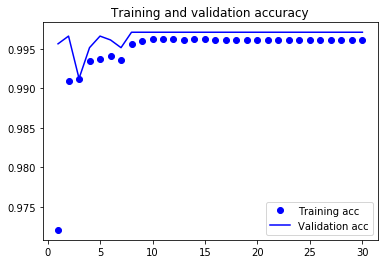

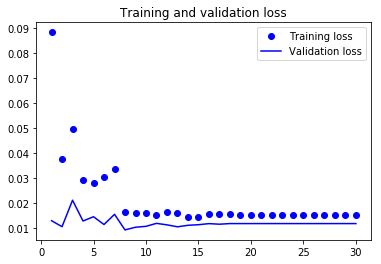

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))    
print("F1 Score: ", f1_score(y_test, y_pred))
print("Accuracy: ", test_acc)

2567/2567 [==============================] - 0s 24us/step
Precision:  0.9861830742659758
Recall:  0.9965095986038395
F1 Score:  0.9913194444444444
Accuracy:  0.9961044020257109
